In [53]:
# Importamos las librerías necesarias para el proceso de limpieza de datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [54]:
# Cargar el dataset
netflix_df = pd.read_csv('netflix_titles.csv')

In [55]:
# Paso 1: Inspección preliminar
print(netflix_df.info())
print(netflix_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

In [56]:
# Paso 2: Tratamiento de valores faltantes
# Para este ejemplo, vamos a reemplazar valores faltantes en 'country' por una categoría 'Unknown'
# y en 'director' y 'cast' vamos a eliminar las filas que tengan valores nulos dado que son importantes para el análisis
netflix_df['country'].fillna('Unknown', inplace=True)
netflix_df.dropna(subset=['director', 'cast'], inplace=True)

In [57]:
# Paso 3: Unificación de tipos de datos
# Convertir 'date_added' a datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')
year = netflix_df['year_added'] = netflix_df['date_added'].dt.year


In [58]:
# Convertimos 'date_added' a datetime y extraemos el año
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year


In [59]:
# Paso 4: Estandarización de texto
# Asumiendo que queremos estandarizar la columna 'title' a minúsculas
netflix_df['title'] = netflix_df['title'].str.lower()

In [60]:
# Paso 5: Manejo de valores atípicos
# Aquí asumiremos que 'release_year' puede tener valores atípicos y los trataremos
Q1 = netflix_df['release_year'].quantile(0.25)
Q3 = netflix_df['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
netflix_df = netflix_df[(netflix_df['release_year'] >= lower_bound) & (netflix_df['release_year'] <= upper_bound)]

In [61]:
# Paso 6: Normalización/Escalado de Datos
# Escalaremos 'release_year' usando MinMaxScaler para normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
netflix_df['release_year_scaled'] = scaler.fit_transform(netflix_df[['release_year']])

In [62]:
# Paso 7: Codificación de Variables Categóricas
# Codificaremos 'rating' con One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
rating_encoded = encoder.fit_transform(netflix_df[['rating']])
rating_encoded_df = pd.DataFrame(rating_encoded, columns=encoder.get_feature_names_out(['rating']))
netflix_df = netflix_df.reset_index(drop=True)  # Resetear el índice para evitar problemas de alineación
netflix_df = pd.concat([netflix_df, rating_encoded_df], axis=1)

In [63]:
# Paso 8: Eliminación de Duplicados
netflix_df = netflix_df.drop_duplicates()

In [64]:
# Paso 9: Ingeniería de Características
# Como ejemplo, crearemos una nueva característica que es la longitud de la descripción
netflix_df['description_length'] = netflix_df['description'].str.len()

In [65]:
# Paso 10: División de Datos
# Supongamos que 'type' es nuestra variable objetivo y queremos predecir si un título es una película o un show de TV
X = netflix_df.drop(['type'], axis=1)  # Eliminamos la variable objetivo del conjunto de características
y = netflix_df['type']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Paso 13: Revisión Final y Guardado
# Guardamos el DataFrame limpio en un nuevo archivo CSV
cleaned_csv_path = 'netflix_cleaned.csv'
netflix_df.to_csv(cleaned_csv_path, index=False)

In [73]:
# Cargar el dataset limpio
netflix_df = pd.read_csv('netflix_cleaned.csv')


# Visualización #1
Distribución del Tipo de Contenido en Netflix:

Hay una predominancia de películas sobre series de televisión en la plataforma. Esto puede indicar una estrategia de contenido orientada hacia el cine o una mayor demanda de películas por parte de los usuarios.

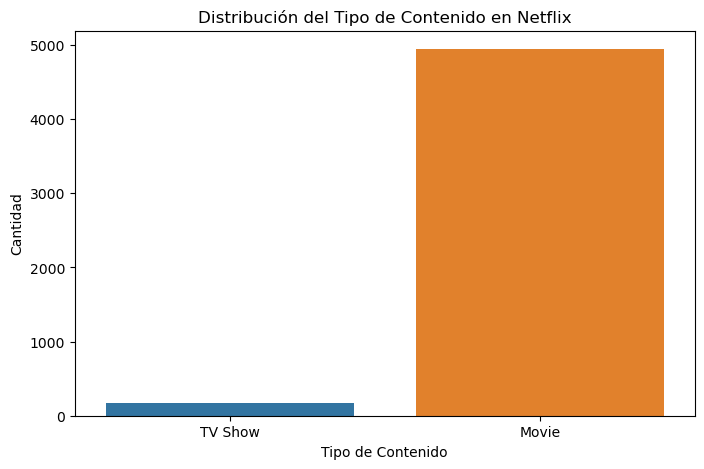

In [74]:
# Visualización 1: Distribución del tipo de contenido
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_df, x='type')
plt.title('Distribución del Tipo de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

# Visualizacion #2
Distribución de Ratings en Netflix:

La clasificación más común en Netflix es 'TV-MA', seguida de 'TV-14' y 'TV-PG'. Esto sugiere que Netflix tiene una amplia oferta de contenidos para adultos y adolescentes, lo que puede reflejar su enfoque en un público más maduro.

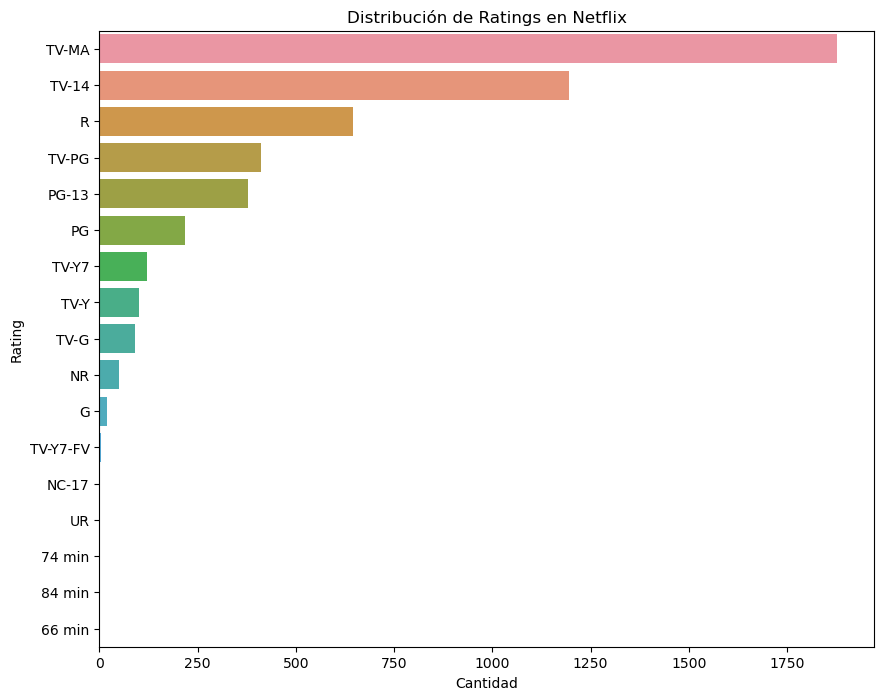

In [75]:
# Visualización 2: Distribución de Ratings en Netflix
plt.figure(figsize=(10, 8))
order = netflix_df['rating'].value_counts().index
sns.countplot(data=netflix_df, y='rating', order=order)
plt.title('Distribución de Ratings en Netflix')
plt.xlabel('Cantidad')
plt.ylabel('Rating')
plt.show()

# Visualizacion #3

*Cantidad de Contenido Agregado por Año en Netflix:*

Existe una tendencia creciente en la cantidad de contenido agregado a Netflix a lo largo de los años, con un pico en los últimos años. Esto podría estar relacionado con una estrategia de expansión y captura de mercado, así como con un enfoque en el contenido original para diferenciarse de otros servicios de streaming.

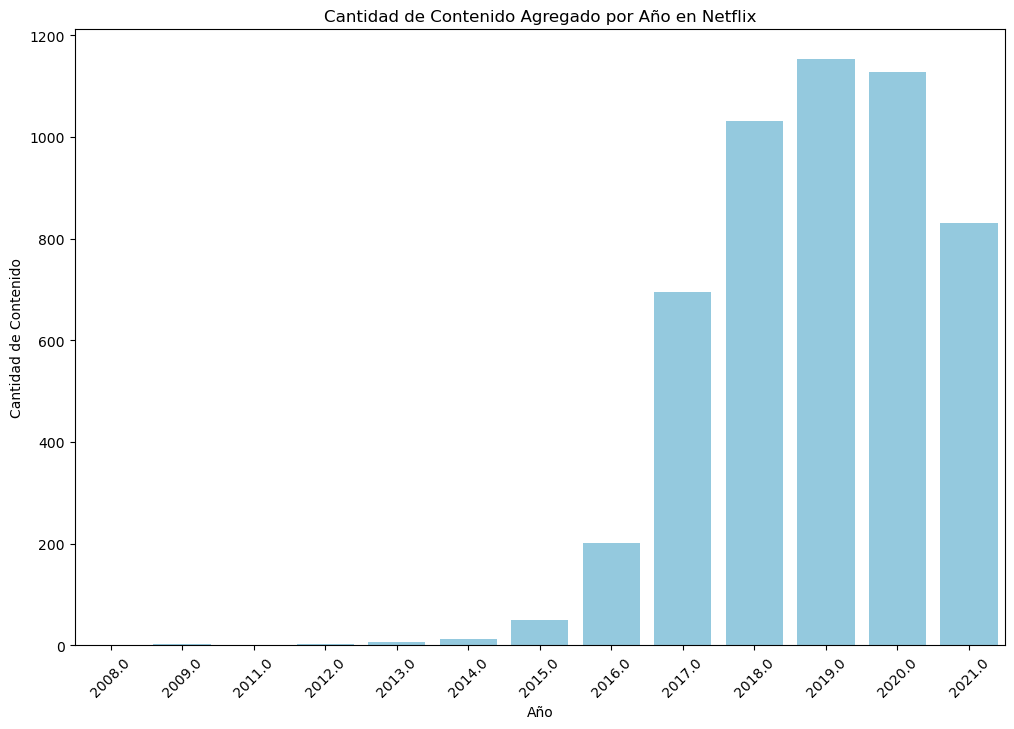

In [76]:
# Visualización 3: Contenido agregado por año en Netflix
plt.figure(figsize=(12, 8))
sns.countplot(data=netflix_df, x='year_added', color='skyblue')
plt.title('Cantidad de Contenido Agregado por Año en Netflix')
plt.xlabel('Año')
plt.ylabel('Cantidad de Contenido')
plt.xticks(rotation=45)
plt.show()

# Visualizacion #4

*Distribución de la Duración de las Películas en Netflix:*

La mayoría de las películas tienen una duración de alrededor de 80 a 120 minutos, alineándose con la duración estándar de las películas en la industria. Esto puede ser parte de una estrategia para cumplir con las expectativas del público en cuanto a la duración de una experiencia cinematográfica tradicional.

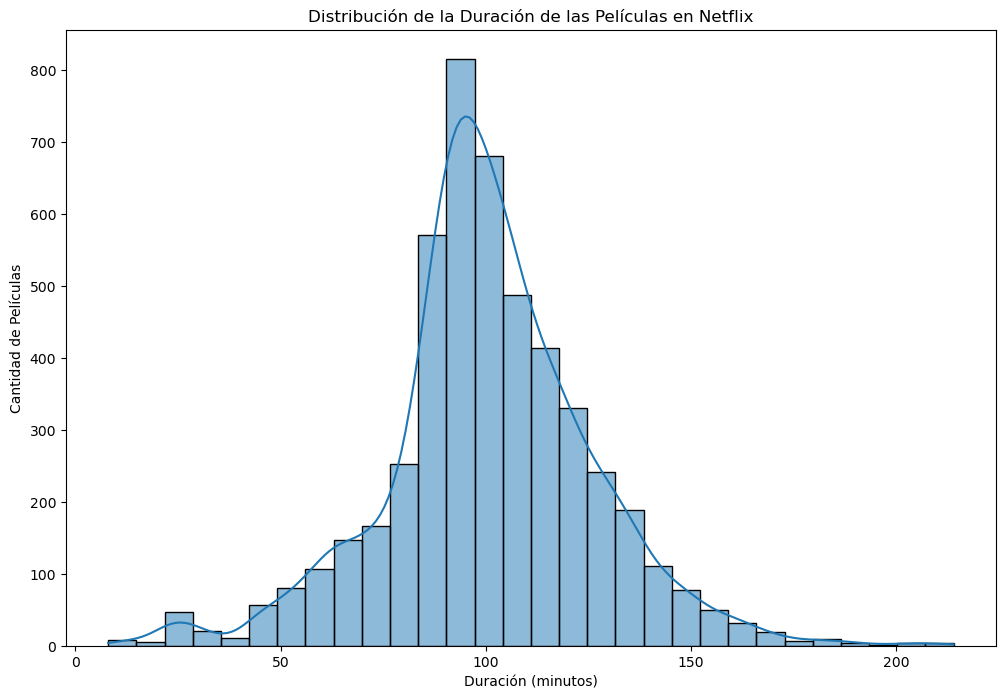

In [77]:
# Visualización 4: Duración típica de las películas en Netflix
# Filtramos solo las películas y quitamos las entradas con datos no numéricos en 'duration'
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')

# Eliminamos valores NaN que no pudieron convertirse a numéricos
movies_df.dropna(subset=['duration'], inplace=True)

plt.figure(figsize=(12, 8))
sns.histplot(movies_df['duration'].astype(int), bins=30, kde=True)
plt.title('Distribución de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de Películas')
plt.show()
